Importing LIBS

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
import seaborn as sns

Reading data

In [3]:
mydata = pd.read_csv('Breastcancer.csv')
mydata

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,...,25.380,17.33,184.60,2019.0,0.16220,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,...,24.990,23.41,158.80,1956.0,0.12380,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,...,23.570,25.53,152.50,1709.0,0.14440,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,...,14.910,26.50,98.87,567.7,0.20980,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,...,22.540,16.67,152.20,1575.0,0.13740,0.075833,0.4000,0.126386,0.2364,0.087483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,9.477218,17.173224,142.00,1479.0,0.110550,0.037279,0.160806,0.047462,...,25.450,26.40,166.10,2027.0,0.14100,0.238996,0.4107,0.163526,0.2060,0.073780
565,926682,M,11.657306,25.502865,131.20,1261.0,0.113881,0.108912,0.134949,0.039279,...,23.690,38.25,155.00,1731.0,0.11660,0.219149,0.3215,0.032357,0.2572,0.068449
566,926954,M,20.102883,14.544119,108.30,858.1,0.100213,0.003465,0.072762,0.042914,...,18.980,34.12,126.70,1124.0,0.11390,0.279461,0.3403,0.113976,0.2218,0.098450
567,927241,M,16.206551,19.616466,140.10,1265.0,0.112486,0.158756,0.096860,0.024182,...,25.740,39.42,184.60,1821.0,0.16500,0.116461,0.9387,0.067784,0.4087,0.074609


Chaceked for Skewed data

In [4]:
mydata.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [5]:
mydata['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
print(mydata.iloc[:,0:15])

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M    14.204716     20.202641          122.80     1001.0   
1      842517         M    18.483496     22.464181          132.90     1326.0   
2    84300903         M    15.516300     18.271486          130.00     1203.0   
3    84348301         M    15.540583     27.560108           77.58      386.1   
4    84358402         M    14.005198     11.678064          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M     9.477218     17.173224          142.00     1479.0   
565    926682         M    11.657306     25.502865          131.20     1261.0   
566    926954         M    20.102883     14.544119          108.30      858.1   
567    927241         M    16.206551     19.616466          140.10     1265.0   
568     92751         B    13.256191     25.087474           47.92      181.0   

     smoothness_mean  compa

In [16]:
print(mydata.diagnosis[0:15])

0     M
1     M
2     M
3     M
4     M
5     M
6     M
7     M
8     M
9     M
10    M
11    M
12    M
13    M
14    M
Name: diagnosis, dtype: object


In [7]:
mydata.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483
5,843786,M,14.084106,26.364901,82.57,477.1,0.116931,-0.010905,0.045666,0.072498,...,15.47,23.75,103.40,741.6,0.1791,0.365008,0.5355,0.155545,0.3985,0.057922
6,844359,M,15.199230,23.912798,119.60,1040.0,0.085277,0.135089,0.054003,0.000230,...,22.88,27.66,153.20,1606.0,0.1442,0.132926,0.3784,0.031519,0.3063,0.079428
7,84458202,M,15.542603,15.964994,90.20,577.9,0.106318,0.152953,0.242739,-0.030635,...,17.06,28.14,110.60,897.0,0.1654,0.388596,0.2678,0.085846,0.3196,0.082534
8,844981,M,15.087924,15.125671,87.50,519.8,0.095879,0.046530,-0.093628,-0.009774,...,15.49,30.73,106.20,739.3,0.1703,0.315621,0.5390,0.107188,0.4378,0.095350
9,84501001,M,15.150892,18.319345,83.97,475.9,0.110456,0.012679,0.028059,-0.001305,...,15.09,40.68,97.65,711.4,0.1853,0.241266,1.1050,0.197198,0.4366,0.072885


In [8]:
mydata.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,925291,B,18.883604,20.403694,74.52,403.5,0.088570,0.173334,0.110262,0.044449,...,12.480,37.16,82.28,474.2,0.12980,0.183338,0.3630,0.048739,0.2112,0.104210
560,925292,B,15.641587,19.106564,91.38,600.4,0.096971,0.082979,0.092175,-0.026195,...,15.300,33.17,100.20,706.7,0.12410,0.153595,0.1326,0.091074,0.2250,0.085812
561,925311,B,13.914248,18.551161,70.67,386.0,0.104688,0.038765,0.059363,0.051250,...,11.920,38.30,75.19,439.6,0.09267,0.248033,0.0000,0.106989,0.1566,0.067225
562,925622,M,15.362088,23.395916,103.40,716.9,0.096347,0.216130,0.062905,0.046674,...,17.520,42.79,128.70,915.0,0.14170,0.329496,1.1700,0.153819,0.4089,0.083204
563,926125,M,9.989657,14.959439,143.00,1347.0,0.095120,0.223011,0.108771,0.029735,...,24.290,29.41,179.10,1819.0,0.14070,0.242927,0.6599,0.024528,0.2929,0.053509
564,926424,M,9.477218,17.173224,142.00,1479.0,0.110550,0.037279,0.160806,0.047462,...,25.450,26.40,166.10,2027.0,0.14100,0.238996,0.4107,0.163526,0.2060,0.073780
565,926682,M,11.657306,25.502865,131.20,1261.0,0.113881,0.108912,0.134949,0.039279,...,23.690,38.25,155.00,1731.0,0.11660,0.219149,0.3215,0.032357,0.2572,0.068449
566,926954,M,20.102883,14.544119,108.30,858.1,0.100213,0.003465,0.072762,0.042914,...,18.980,34.12,126.70,1124.0,0.11390,0.279461,0.3403,0.113976,0.2218,0.098450
567,927241,M,16.206551,19.616466,140.10,1265.0,0.112486,0.158756,0.096860,0.024182,...,25.740,39.42,184.60,1821.0,0.16500,0.116461,0.9387,0.067784,0.4087,0.074609
568,92751,B,13.256191,25.087474,47.92,181.0,0.110289,0.044248,-0.072171,0.029954,...,9.456,30.37,59.16,268.6,0.08996,0.389369,0.0000,0.192663,0.2871,0.062577


In [9]:
mydata.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.157073,19.025699,91.969033,654.889104,0.095887,0.106397,0.092388,0.048655,0.179979,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.243948,0.272188,0.122288,0.290076,0.082584
std,1.250206e+08,3.435295,4.515361,24.298981,351.914129,0.013778,0.051773,0.082573,0.042227,0.026742,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.156127,0.208624,0.064848,0.061867,0.018546
min,8.670000e+03,2.174108,5.225685,43.790000,143.500000,0.045915,-0.055431,-0.156186,-0.078615,0.103582,...,7.930000,12.020000,50.410000,185.200000,0.071170,-0.198310,0.000000,-0.133583,0.156500,0.031090
25%,8.692180e+05,11.762811,15.926529,75.170000,420.300000,0.085801,0.070217,0.037784,0.020214,0.162974,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.130946,0.114500,0.077446,0.250400,0.068561
50%,9.060240e+05,14.142920,19.135095,86.240000,551.100000,0.096244,0.105569,0.093832,0.048666,0.179796,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.237884,0.226700,0.120702,0.282200,0.082181
75%,8.813129e+06,16.403557,22.060029,104.100000,782.700000,0.105867,0.143065,0.148154,0.077010,0.198569,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.345980,0.382900,0.162843,0.317900,0.094202
max,9.113205e+08,24.961616,31.692291,188.500000,2501.000000,0.144596,0.248430,0.335120,0.189527,0.261135,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.693251,1.252000,0.313149,0.663800,0.140263


In [10]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
#missing value
mydata.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_wors           0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#There are no missing value

#EDA

In [12]:
benign_mydata = mydata[mydata['diagnosis'] == 0]
malignant_mydata = mydata[mydata['diagnosis'] == 1]

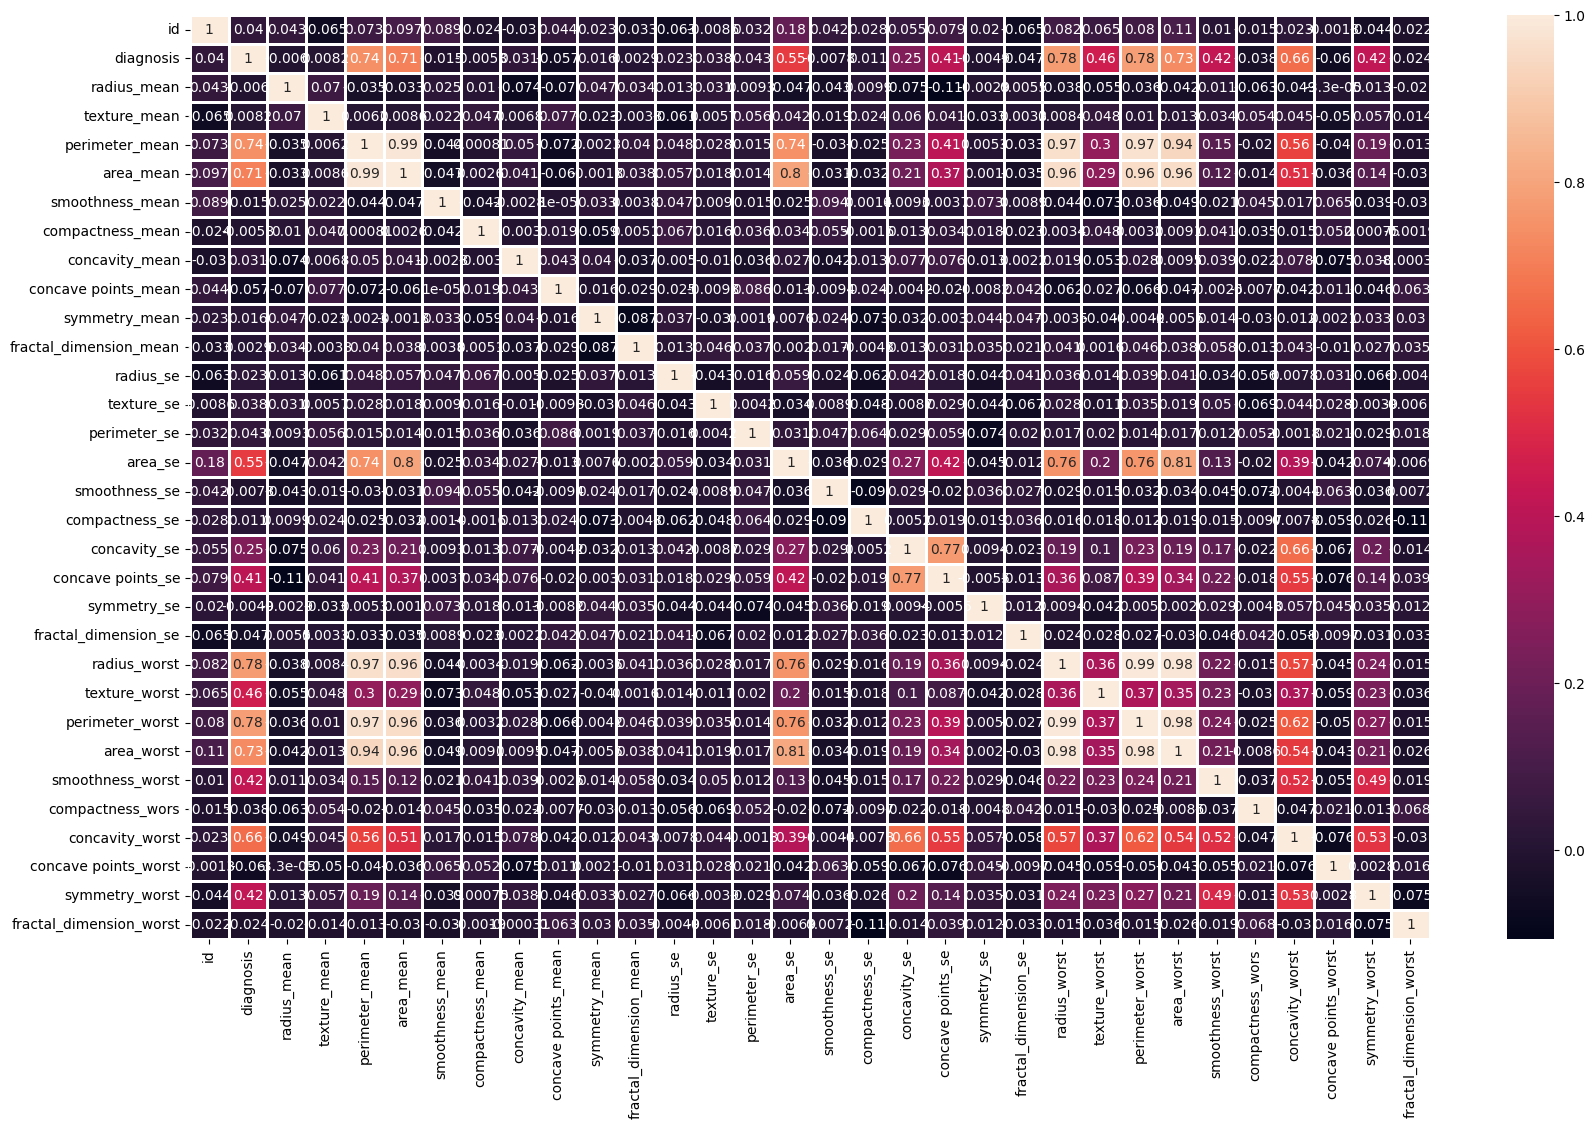

In [104]:
plt.figure(figsize=(20,12))
corr=mydata.corr()
sns.heatmap(corr , linewidths=1, annot=True)
plt.show()

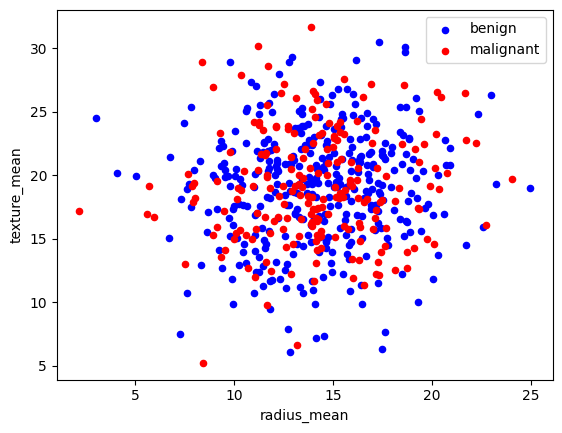

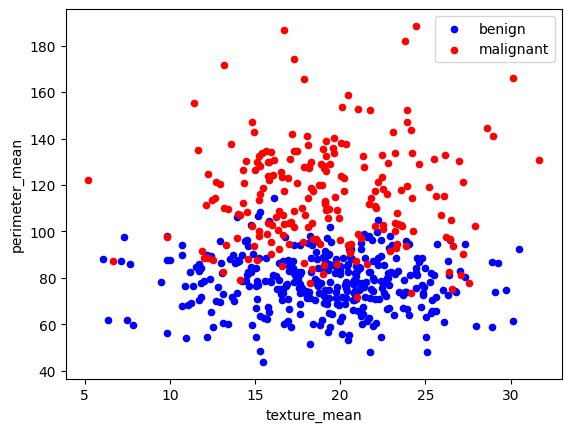

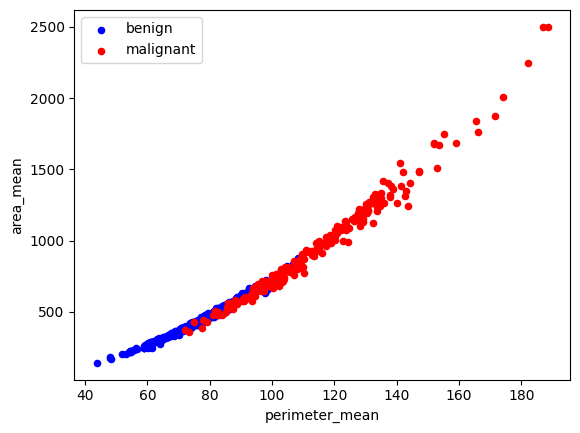

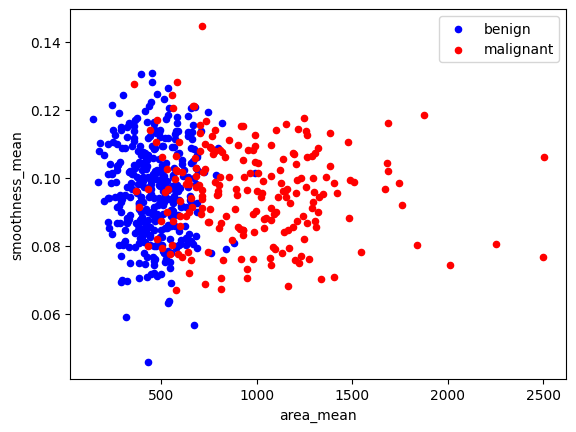

In [90]:
for i in range(len(attributes) - 1):
    b = benign_mydata.plot(kind='scatter', x=attributes[i], y=attributes[i + 1], label='benign', color='b')
    m = malignant_mydata.plot(kind='scatter', x=attributes[i], y=attributes[i + 1], label='malignant', color='r', ax=b)


In [19]:
X = np.asarray(mydata[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean"]])
y = np.asarray(mydata[["diagnosis"]])

Split data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [37]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')

In [38]:
clf.fit(X_train,y_train)

c:\Users\Karan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [39]:
y_pred = clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8771929824561403

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[71,  3],
       [11, 29]], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[71,  3],
       [11, 29]], dtype=int64)

In [45]:
import pickle
filename = 'breast_cancer.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [47]:
model = pickle.load(open(filename, 'rb'))
output=model.predict([[30.43,20.15,300.8,5.103,0.06]])